# Исследование сервиса аренды самокатов GoFast
Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоватья:
* без подписки
    * абонентская плата отсутствует;   
    * стоимость одной минуты поездки — 8 рублей;   
    * стоимость старта (начала поездки) — 50 рублей;   
* с подпиской Ultra   
    * абонентская плата — 199 рублей в месяц;   
    * стоимость одной минуты поездки — 6 рублей;   
    * стоимость старта — бесплатно.   арта — бесплатно.

## Описание данных
В основных данных есть информация о пользователях, их поездках и подписках:

**Пользователи — `users_go.csv`**

`user_id` - уникальный идентификатор пользователя\
`name` - имя пользователя\
`age` - возраст\
`city` - город\
`subscription_type` - тип подписки (free, ultra)

**Поездки — `rides_go.csv`**

`user_id` - уникальный идентификатор пользователя\
`distance` - расстояние, которое пользователь проехал в текущей сессии (в метрах)\
`duration` - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»\
`date` - дата совершения поездки

**Подписки — `subscriptions_go.csv`**

`subscription_type` - тип подписки\
`minute_price` - стоимость одной минуты поездки по данной подписке\
`start_ride_price` - стоимость начала поездки\
`subscription_fee` - стоимость ежемесячного платежа

#### Шаг 1. Загрузка данных

**Загружаем необходимые библиотеки**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

**Считаем CSV-файл `users_go.csv` и сохраним его в датафрейм `users`**

In [2]:
try:
    users = pd.read_csv('/datasets/users_go.csv')
except:
    users = pd.read_csv('users_go.csv')

**Считаем CSV-файл `rides_go.csv` и сохраним его в датафрейм `rides`**

In [3]:
try:
    rides = pd.read_csv('/datasets/rides_go.csv')
except:
    rides = pd.read_csv('rides_go.csv')

**Считаем CSV-файл `subscriptions_go.csv` и сохраним его в датафрейм `subscriptions`**

In [4]:
try:
    subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    subscriptions = pd.read_csv('subscriptions_go.csv')

**Изучим общую информацию о каждом датафрейме**

   user_id        name  age            city subscription_type
0        1        Кира   22          Тюмень             ultra
1        2   Станислав   31            Омск             ultra
2        3     Алексей   20          Москва             ultra
3        4  Константин   26  Ростов-на-Дону             ultra
4        5       Адель   28            Омск             ultra
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None


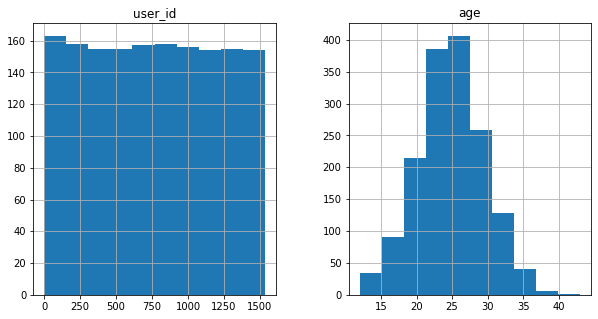

In [5]:
# Датафрейм users
def information(dataset):
    print(dataset.head())
    print(dataset.info())
    dataset.hist(figsize = (10,5))
    plt.show()
information(users)

**На гистограмме `age` можно увидеть самый популярный интервал - от 24 до 27. Реже всего встречаются пользователи старше 37 лет.**

   user_id     distance   duration        date
0        1  4409.919140  25.599769  2021-01-01
1        1  2617.592153  15.816871  2021-01-18
2        1   754.159807   6.232113  2021-04-20
3        1  2694.783254  18.511000  2021-08-11
4        1  4028.687306  26.265803  2021-08-28
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None


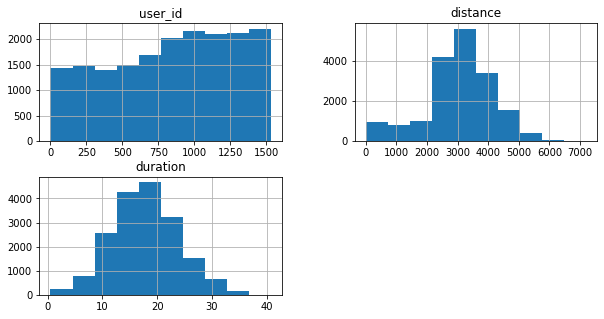

In [6]:
# Датафрейм rides
# def information(dataset):
#     print(dataset.head())
#     print(dataset.info())
#     dataset.hist(figsize = (10,5))
#     plt.show()
information(rides)

**Гистограмма столбца `user_id` описывает количество поездок на самокате по каждому id, большинство поездок приходится на пользователей с id больше 750. `distance` показывает, какое расстояние чаще всего проезжают пользователи, пик приходится на интервал от 3000 до 3500 метров. `duration` характеризует продолжительность поездки, самые популярные значения 17 - 20 минут.**

In [7]:
# Датафрейм subscriptions
def information(dataset):
    print(dataset.head())
    print(dataset.info())
information(subscriptions)

  subscription_type  minute_price  start_ride_price  subscription_fee
0              free             8                50                 0
1             ultra             6                 0               199
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes
None


#### Шаг 2. Предобработка данных

In [8]:
# Приведём столбец date к типу даты
rides['date'] = pd.to_datetime(rides['date'], format = '%Y-%m-%d')

In [9]:
# Создаём столбец с номером месяца
rides['month'] = rides['date'].dt.month
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [10]:
print(rides['date'].min(),'\n',rides['date'].max())

2021-01-01 00:00:00 
 2021-12-30 00:00:00


**Данные предоставлены за полный период 2021 года**

In [11]:
# Проверим наличие пропущенных значений
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [12]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [13]:
subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

**Пропущенные значения отсутствуют во всех трёх таблицах**

In [14]:
# Рассмотрим явные дубликаты в таблице data_users
users.duplicated().sum()

31

In [15]:
# Избавляемся от явных дубликатов, оставляя первую встречающуюся строку
users = users.drop_duplicates(subset = ['user_id'], keep = 'first').reset_index(drop = True)
users.duplicated().sum()

0

**Дубликаты оказались только в данных `data_users`, теперь количество id пользователей идентично таблице `data_rides`.**

#### Шаг 3. Исследовательский анализ данных

**Частота встречаемости городов**

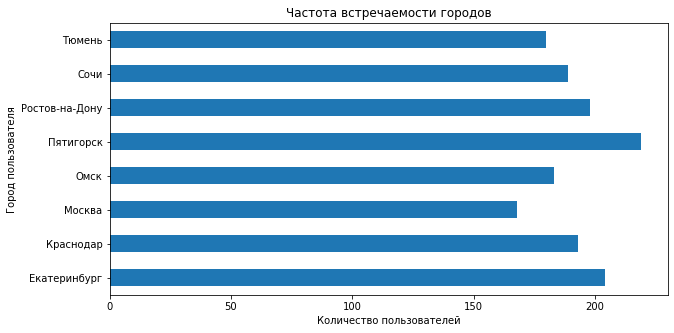

In [16]:
city_values = users.pivot_table(index = 'city', values = 'user_id', aggfunc = 'count')

ax = city_values.plot.barh(
    y='user_id', 
    figsize=(10, 5),
    legend = False
)
# ax.bar_label(ax.containers[0]) # Делаем аннотацию столбцов 
plt.xlabel('Количество пользователей')
plt.ylabel('Город пользователя')
plt.title('Частота встречаемости городов')
plt.show()

**На графике видно, что частота встречаемости городов в наших данных примерно одинакова. Лидером является Пятигорск - 219 пользователей. Минимальное количество пользователей в Москве - 168 человек. Это можно объяснить тем, что в Москве преодолеваются более большие расстояния, требующие общественный транспорт, когда в Пятигорске намного проще добраться до многих точек на карте на самокате.**

**Соотношение пользователей с подпиской и без подписки**

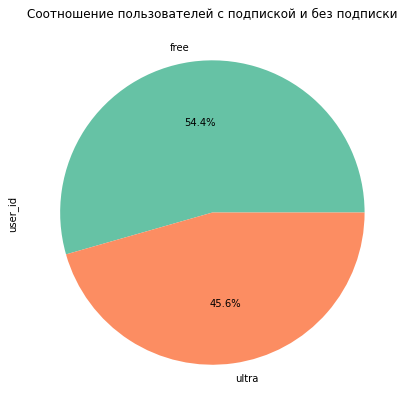

In [17]:
(users
    .pivot_table(index = 'subscription_type', values = 'user_id', aggfunc = 'count')
    .plot(
        title = 'Соотношение пользователей с подпиской и без подписки',
        kind = 'pie',
        y = 'user_id',
        figsize = (10,7),
        legend = False,
        autopct='%1.1f%%',
        colors=sns.color_palette('Set2')
    )
)
plt.show()

**Количество пользователей с подпиской и без распределены почти пополам (без подписки - 54.4%, с подпиской - 45.6%). Такое деление отлично сказывается на дальнейшем анализе данных, позволяя спокойно сравнивать пользователей с подпиской и без.**

**Возраст пользователей**

In [18]:
users['age'].value_counts()

25    145
24    132
26    131
23    129
27    119
22    119
28    112
21     93
20     71
30     68
29     68
31     48
19     47
18     46
32     41
33     39
17     26
34     19
16     19
35     15
15     13
14      9
13      8
36      6
12      4
38      3
37      2
39      1
43      1
Name: age, dtype: int64

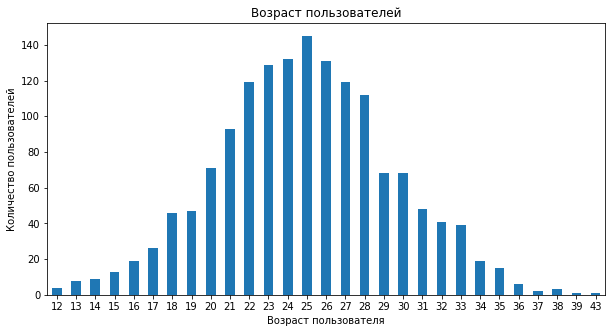

In [19]:
users_age = users.pivot_table(index = 'age', values = 'user_id', aggfunc = 'count')

ax = users_age.plot(
    kind = 'bar',
    y='user_id', 
    figsize=(10, 5),
    legend = False
)
# ax.bar_label(ax.containers[0]) # Делаем аннотацию столбцов 
plt.xlabel('Возраст пользователя')
plt.ylabel('Количество пользователей')
plt.xticks(rotation = 360)
plt.title('Возраст пользователей')
plt.show()

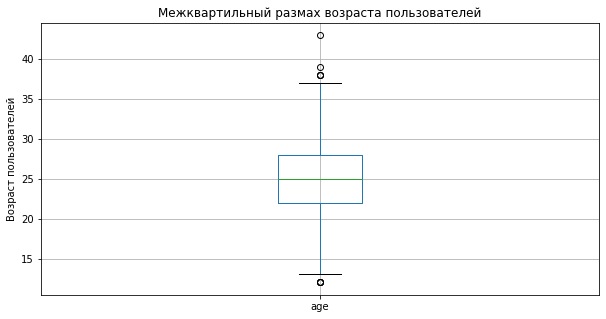

In [20]:
users.plot(
    y = 'age',
    kind='box', 
    figsize=(10, 5),
    grid = True
)
plt.title('Межквартильный размах возраста пользователей')
plt.ylabel('Возраст пользователей')
plt.show()

**Целевой аудиторией можно назвать пользователей от 20 до 30 лет. Самый часто встречаемый возраст пользователей - 25 лет (145 человек). Реже всего встречаются дети (12 - 14 лет) и люди старше 36 лет, что отражено выбросами на диаграмме размаха.**

**Расстояние, которое пользователь преодолел за одну поездку**

In [21]:
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

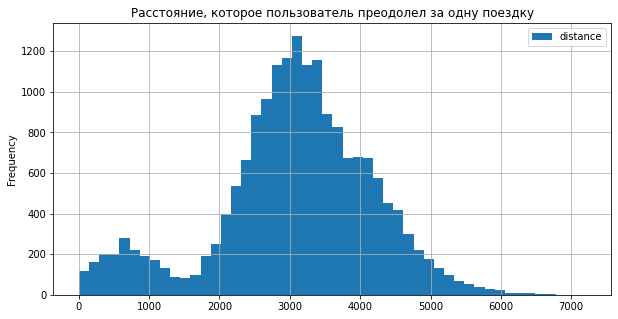

In [22]:
rides.plot(
    kind = 'hist',
    y = 'distance',
    bins = 50,
    figsize = (10,5),
    title = 'Расстояние, которое пользователь преодолел за одну поездку',
    grid = True,
    xlabel = 'Расстояние в метрах',
    ylabel = 'Количество пользователей'
)
plt.show()

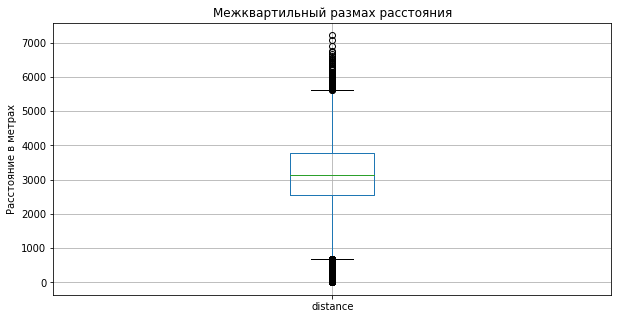

In [23]:
rides.plot(
    y = 'distance',
    kind='box', 
    figsize=(10, 5),
    grid = True
)
plt.title('Межквартильный размах расстояния')
plt.ylabel('Расстояние в метрах')
plt.show()

**В среднем пользователи за поездку преодолевают расстояние в 3000 метров, такой показатель можно объяснить тем, что самокаты часто используются, чтобы добраться до неотдаленных мест, заменяя общественный транспорт. Большие расстояния (от 5900 метров) попадают в категорию выбросов, как и короткие поездки до 1000 метров.**

**Продолжительность поездок**

In [24]:
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

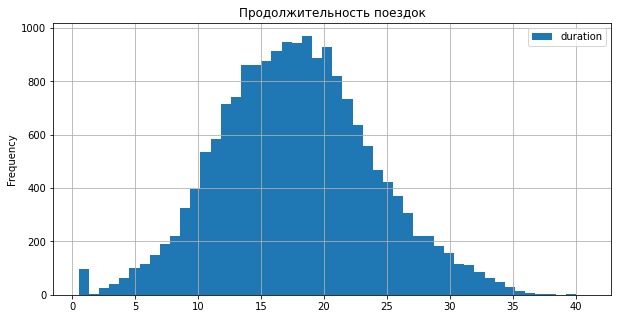

In [25]:
rides.plot(
    kind = 'hist',
    y = 'duration',
    bins = 50,
    figsize = (10,5),
    title = 'Продолжительность поездок',
    grid = True,
    xlabel = 'Длительность в минутах',
    ylabel = 'Количество пользователей'
)
plt.show()

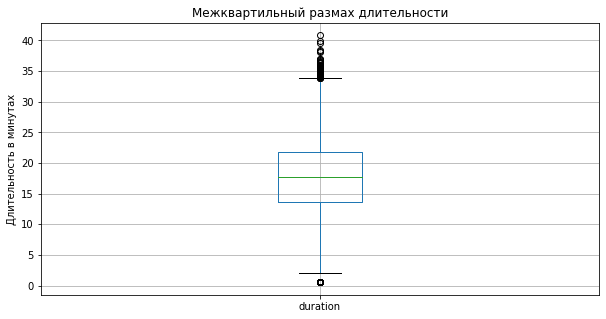

In [26]:
rides.plot(
    y = 'duration',
    kind='box', 
    figsize=(10, 5),
    grid = True
)
plt.title('Межквартильный размах длительности')
plt.ylabel('Длительность в минутах')
plt.show()

**Чаще всего поездки у пользователей занимают от 15 до 20 минут, что также связывается с самым популярным промежутком расстояния (3000 метров на самокате проезжаются примерно за 15 минут). Самые короткие поездки составляют около 2 минут и являются выбросами, вероятнее всего это пользователи, передумавшие пользоваться самокатом после активации. Длинные поездки более 35 минут - редкий случай.**

#### Шаг 4. Объединение данных

In [27]:
# Объединяем данные о пользователях, поездках и подписках
data = rides.merge(users, on = 'user_id')
data = data.merge(subscriptions, on = 'subscription_type')
data

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11,Альберт,25,Краснодар,free,8,50,0
18064,1534,2840.423057,21.409799,2021-11-16,11,Альберт,25,Краснодар,free,8,50,0
18065,1534,3826.185507,18.435051,2021-11-18,11,Альберт,25,Краснодар,free,8,50,0
18066,1534,2902.308661,16.674362,2021-11-27,11,Альберт,25,Краснодар,free,8,50,0


In [28]:
# Проверяем размерность таблиц
if rides.shape[0] == data.shape[0]:
    print('Данные соединены верно')
else:
    print('Данные соединены неверно')

Данные соединены верно


In [29]:
# Проверяем data на наличие пропусков 
data.isna().sum()

user_id              0
distance             0
duration             0
date                 0
month                0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

**Количесто строк в таблице до и после объединения совпадает, а пропуски отсутствуют, что говорит нам об удачно проведенной операции. Благодаря объединению, мы получили полную таблицу данных, где для каждой поездки есть соответствующая информация о пользователе, который ее совершил и о типе его подписки.**

In [30]:
# Датафрейм с данными о пользователях без подписки 
data_free = data.query('subscription_type in "free"').reset_index()
data_free

,index,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
1,6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
2,6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
3,6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
4,6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11563,18063,1534,3781.098080,19.822962,2021-11-04,11,Альберт,25,Краснодар,free,8,50,0
11564,18064,1534,2840.423057,21.409799,2021-11-16,11,Альберт,25,Краснодар,free,8,50,0
11565,18065,1534,3826.185507,18.435051,2021-11-18,11,Альберт,25,Краснодар,free,8,50,0
11566,18066,1534,2902.308661,16.674362,2021-11-27,11,Альберт,25,Краснодар,free,8,50,0


In [31]:
# Проверяем data_free на наличие пропусков 
data_free.isna().sum()

index                0
user_id              0
distance             0
duration             0
date                 0
month                0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [32]:
# Датафрейм с данными о пользователях с подпиской
data_ultra = data.query('subscription_type in "ultra"').reset_index()
data_ultra

,index,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,6495,699,3973.046497,24.671163,2021-08-29,8,Оксана,22,Москва,ultra,6,0,199
6496,6496,699,3288.702563,15.892886,2021-09-12,9,Оксана,22,Москва,ultra,6,0,199
6497,6497,699,3076.159348,14.389525,2021-09-26,9,Оксана,22,Москва,ultra,6,0,199
6498,6498,699,4707.845501,15.839579,2021-10-17,10,Оксана,22,Москва,ultra,6,0,199


In [33]:
# Проверяем data_ultra на наличие пропусков 
data_ultra.isna().sum()

index                0
user_id              0
distance             0
duration             0
date                 0
month                0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [34]:
# Проверяем размерность полученных таблиц
if data_ultra.shape[0] + data_free.shape[0] == data.shape[0]:
    print('Данные разделены верно')
else:
    print('Данные разделены неверно')

Данные разделены верно


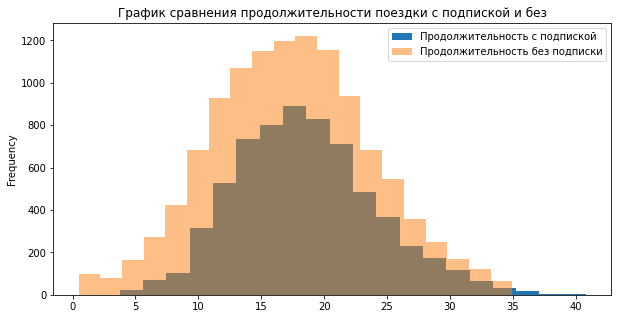

In [35]:
ax = data_ultra.plot(kind = 'hist', y = 'duration', bins = 20, label = 'Продолжительность с подпиской')
data_free.plot(
    kind = 'hist',
    y = 'duration',
    bins = 20,
    ax = ax,
    alpha = 0.5,
    label = 'Продолжительность без подписки', 
    figsize = (10, 5),
    xlabel = 'Время в минутах',
    ylabel = 'Количество пользователей'
)
plt.title('График сравнения продолжительности поездки с подпиской и без')
plt.show()

**Оранжевая зона графика отражает продолжительность поездок пользователей без подписки. Синяя зона графика отражает продолжительность поездок пользователей с подпиской. Можно отчетливо увидеть, что пользователи без подписки имеют более длительные поездки, при этом пользователи без подписки намного чаще берут самокат для коротких поездок.**

In [36]:
print('Статистика пройденного расстояния пользователей без подписки:','\n',data_free['distance'].describe())

Статистика пройденного расстояния пользователей без подписки: 
 count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64


In [37]:
print('Статистика пройденного расстояния пользователей с подпиской:','\n',data_ultra['distance'].describe())

Статистика пройденного расстояния пользователей с подпиской: 
 count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64


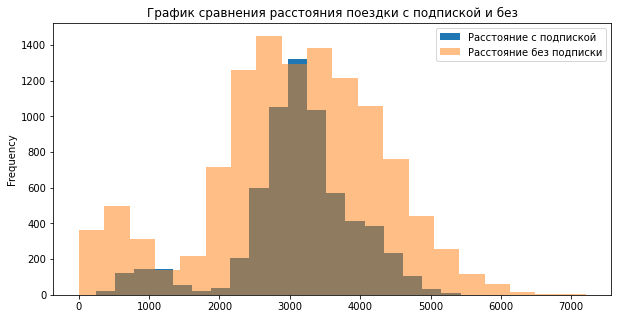

In [38]:
ax = data_ultra.plot(kind = 'hist', y = 'distance', bins = 20, label = 'Расстояние с подпиской')
data_free.plot(
    kind = 'hist',
    y = 'distance',
    bins = 20,
    ax = ax,
    alpha = 0.5,
    label = 'Расстояние без подписки', 
    figsize = (10, 5),
    xlabel = 'Расстояние в метрах',
    ylabel = 'Количество пользователей'
)
plt.title('График сравнения расстояния поездки с подпиской и без')
plt.show()

**Оранжевая зона графика отражает расстояние поездок пользователей без подписки. Синяя зона графика отражает расстояние поездок пользователей с подпиской. Пользователи без подписки преобладают в поездках на короткие расстояния до 1000 км и также проезжают более длинные дистанции, чем пользователи с подпиской.**

#### Шаг 5. Подсчёт выручки

In [39]:
data['duration'] = np.ceil(data['duration'])
data_grouped = data.groupby(['user_id', 'month', 'minute_price', 'start_ride_price', 'subscription_fee'])\
.agg({'distance':'sum', 'duration':'sum', 'user_id':'count','subscription_type':'min',\
      'minute_price':'min', 'start_ride_price':'min', 'subscription_fee':'min' })
data_grouped.columns = ['distance', 'duration', 'amount', 'subscription_type', 'minute_price', 'start_ride_price', 'subscription_fee']
data_grouped

distance  \
user_id month minute_price start_ride_price subscription_fee                 
1       1     6            0                199                7027.511294   
        4     6            0                199                 754.159807   
        8     6            0                199                6723.470560   
        10    6            0                199                5809.911100   
        11    6            0                199                7003.499363   
...                                                                    ...   
1534    6     8            50               0                  3409.468534   
        8     8            50               0                  7622.453034   
        9     8            50               0                  4928.173852   
        11    8            50               0                 13350.015305   
        12    8            50               0                  2371.711192   

                                                              duration  \
user_id month minute_price start_ride_price subscription_fee             
1       1     6            0                199                   42.0   
        4     6            0                199                    7.0   
        8     6            0                199                   46.0   
        10    6            0                199                   32.0   
        11    6            0                199                   56.0   
...                                                                ...   
1534    6     8            50               0                     26.0   
        8     8            50               0                     48.0   
        9     8            50               0                     23.0   
        11    8            50               0                     78.0   
        12    8            50               0                     16.0   

                                                              amount  \
user_id month minute_price start_ride_price subscription_fee           
1       1     6            0                199                    2   
        4     6            0                199                    1   
        8     6            0                199                    2   
        10    6            0                199                    2   
        11    6            0                199                    3   
...                                                              ...   
1534    6     8            50               0                      2   
        8     8            50               0                      2   
        9     8            50               0                      1   
        11    8            50               0                      4   
        12    8            50               0                      1   

                                                             subscription_type  \
user_id month minute_price start_ride_price subscription_fee                     
1       1     6            0                199                          ultra   
        4     6            0                199                          ultra   
        8     6            0                199                          ultra   
        10    6            0                199                          ultra   
        11    6            0                199                          ultra   
...                                                                        ...   
1534    6     8            50               0                             free   
        8     8            50               0                             free   
        9     8            50               0                             free   
        11    8            50               0                             free   
        12    8            50               0                             free   

                                                              minute_price  \
user_i

In [40]:
# Проверяем data_grouped на наличие пропусков
data_grouped.isna().sum()

distance             0
duration             0
amount               0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [41]:
def payment(row):
    
    subscription = row['subscription_type']
    duration = row['duration']
    amount = row['amount']
    start_ride_price = row['start_ride_price']
    minute_price = row['minute_price']
    subscription_fee = row['subscription_fee']
    
    if subscription == 'free':
        payment = start_ride_price * amount + minute_price * duration
        return payment
    if subscription == 'ultra':
        payment = duration * minute_price + subscription_fee
        return payment
data_grouped['payment'] = data_grouped.apply(payment, axis = 1)

In [42]:
data_grouped

distance  \
user_id month minute_price start_ride_price subscription_fee                 
1       1     6            0                199                7027.511294   
        4     6            0                199                 754.159807   
        8     6            0                199                6723.470560   
        10    6            0                199                5809.911100   
        11    6            0                199                7003.499363   
...                                                                    ...   
1534    6     8            50               0                  3409.468534   
        8     8            50               0                  7622.453034   
        9     8            50               0                  4928.173852   
        11    8            50               0                 13350.015305   
        12    8            50               0                  2371.711192   

                                                              duration  \
user_id month minute_price start_ride_price subscription_fee             
1       1     6            0                199                   42.0   
        4     6            0                199                    7.0   
        8     6            0                199                   46.0   
        10    6            0                199                   32.0   
        11    6            0                199                   56.0   
...                                                                ...   
1534    6     8            50               0                     26.0   
        8     8            50               0                     48.0   
        9     8            50               0                     23.0   
        11    8            50               0                     78.0   
        12    8            50               0                     16.0   

                                                              amount  \
user_id month minute_price start_ride_price subscription_fee           
1       1     6            0                199                    2   
        4     6            0                199                    1   
        8     6            0                199                    2   
        10    6            0                199                    2   
        11    6            0                199                    3   
...                                                              ...   
1534    6     8            50               0                      2   
        8     8            50               0                      2   
        9     8            50               0                      1   
        11    8            50               0                      4   
        12    8            50               0                      1   

                                                             subscription_type  \
user_id month minute_price start_ride_price subscription_fee                     
1       1     6            0                199                          ultra   
        4     6            0                199                          ultra   
        8     6            0                199                          ultra   
        10    6            0                199                          ultra   
        11    6            0                199                          ultra   
...                                                                        ...   
1534    6     8            50               0                             free   
        8     8            50               0                             free   
        9     8            50               0                             free   
        11    8            50               0                             free   
        12    8            50               0                             free   

                                                              minute_price  \
user_i

In [43]:
print('Общая выручка за 2021 год:', data_grouped['payment'].sum())

Общая выручка за 2021 год: 3878641.0


In [44]:
print('Общая выручка за 2021 год пользователей без подписки:', \
      data_grouped.loc[data_grouped['subscription_type'] == 'free', 'payment'].sum())
print('Средняя выручка за 2021 год пользователей без подписки:', \
      data_grouped.loc[data_grouped['subscription_type'] == 'free', 'payment'].mean())

Общая выручка за 2021 год пользователей без подписки: 2234104.0
Средняя выручка за 2021 год пользователей без подписки: 328.6413651073845


In [45]:
print('Общая выручка за 2021 год пользователей с подпиской:', \
      data_grouped.loc[data_grouped['subscription_type'] == 'ultra', 'payment'].sum())
print('Средняя выручка за 2021 год пользователей с подпиской:', \
      data_grouped.loc[data_grouped['subscription_type'] == 'ultra', 'payment'].mean())

Общая выручка за 2021 год пользователей с подпиской: 1644537.0
Средняя выручка за 2021 год пользователей с подпиской: 362.7921906022502


**Выручка сервиса аренды самокатов "GoFast" за 2021 год составила 3 878 641 рублей.**

#### Шаг 6. Проверка гипотез

**6.1:** Пользователи с подпиской тратят больше времени на поездки. Если да, то пользователи с подпиской могут быть «выгоднее» для компании.

**H₀:** Средняя продолжительность поездок с подпиской ultra **равна** средней продолжительности поездок без подписки free\
**H₁:** Средняя продолжительность поездок с подпиской ultra **больше** средней продолжительности поездок без подписки free

In [46]:
free = data_free['duration']
ultra = data_ultra['duration']

alpha = 0.05
results = st.ttest_ind(
    ultra,
    free,
    alternative = 'greater'
)

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


**В результате наша нулевая гипотеза о том, что пользователи с подпиской тратят такое же время на поездки, что пользователи без подписки была отвергнута. Можем предположить, что пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки, что хорошо сказывается на прибыли, так как цена за минуту поездки с подпиской ниже. Поэтому более длительные поездки могут покрыть разницу в цене за минуту.**

**6.2:** Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

**H₀:** Средняя пройденная дистанция с подпиской ultra **равна** оптимальному расстоянию 3130 метров\
**H₁:** Средняя пройденная дистанция с подпиской ultra **больше** оптимального расстояния 3130 метров

In [47]:
ultra_distance = data_ultra['distance']
value = 3130

alpha = 0.05
results = st.ttest_1samp(
    ultra_distance,
    value,
    alternative = 'greater'
)

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


**В результате нулевая гипотеза не была отвергнута, значит, средняя пройденная дистанция с подпиской ultra меньше либо равна оптимальному расстоянию в 3130 метров. Такой результат позволяет оценить необходимость замены самокатов для комфорта пользователей.**

**6.3:** Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

**H₀:** Средняя помесячная выручка пользователей с подпиской ultra **равна** средней помесячной выручке пользователей без подписки free\
**H₁:** Средняя помесячная выручка пользователей с подпиской ultra **больше** средней помесячной выручки пользователей без подписки free

In [48]:
free_payment = data_grouped.loc[data_grouped['subscription_type'] == 'free', 'payment']
ultra_payment = data_grouped.loc[data_grouped['subscription_type'] == 'ultra', 'payment']

alpha = 0.05
results = st.ttest_ind(
    ultra_payment,
    free_payment,
    alternative = 'greater'
)

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


**В результате была отвергнута нулевая гипотеза, следовательно можем предположить, что выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки. Если данный показатель подтвердится, то компании "GoFast" стоит делать акцент на продаже подписок для повышения прибыли.**

**6.4** Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

**H₀:** Среднее количество обращений до обновления **равно** среднему количеству обращений после обновления\
**H₁:** Среднее количество обращений до обновления **больше** среднего количества обращений после обновления

**Для проверки данной гипотезы понадобится двухвыборочный t-тест для зависимых выборок (scipy.stats.ttest_rel()). Сначала подаём выборку до обновления, затем выборку после проведенного обновления. Используем правостороннюю гипотезу о том, что истинное среднее количество обращений до изменения больше, чем среднее количество обращений после изменения.**

In [49]:
before = [157, 114, 152, 355, 155, 513, 299, 268, 164, 320, 
          192, 262, 506, 240, 364, 179, 246, 427, 187, 431, 
          320, 193, 313, 347, 312, 92, 177, 225, 242, 312]

after = [282, 220, 162, 226, 296, 479, 248, 322, 298, 418, 
         552, 246, 251, 404, 368, 484, 358, 264, 359, 410, 
         382, 350, 406, 416, 438, 364, 283, 314, 420, 218]

alpha = 0.05 

results = st.ttest_rel(before, after, alternative = 'greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9970870137710205
Не получилось отвергнуть нулевую гипотезу


## Общий вывод

**В проведенном исследовании мы рассмотрели данные о пользователях сервиса самокатов. Благодаря нашему исследованию, мы получили следующие значимые показатели при общем анализе данных:**

* Самый популярный город - Пятигорск (219 пользователей), меньше всего пользуется популярностью Москва (168 пользователей)
* Пользователи с подпиской составляют 54.4%, без подписки - 45.6%
* Самый популярный возраст - 25 лет (145 пользователей). Дети до 14 лет и взрослые старше 36 лет - редкие пользователи сервиса
* Чаще всего пользователи преодолевают расстояние в 3000 метров, длительные поездки больше 6000 метров почти не пользуются спросом
* Чаще всего поездки у пользователей занимают от 15 до 20 минут

**Выручка сервиса аренды самокатов "GoFast" за 2021 год составила 3 878 641 рублей. Для пользователей с подпиской и без выручка распределилась следующим образом:**

* Общая выручка за 2021 год пользователей без подписки составила 2 234 104 рублей. Для пользователей с подпиской это 1 644 537 рублей
* Средняя выручка за 2021 год пользователей без подписки составила 328 рублей. Для пользователей с подпиской - 362 рубля

**Сравнивания пользователей с подпиской и без, мы сделали следующие выводы:**

* Длительность поездок пользователей без подписки чаще всего составляет 10 - 20 минут, с подпиской 15 - 25 минут. Также с подпиской больше показателей поездок дольше 35 минут.
* Самое популярное расстояние, которое преодолевают пользователи без подписки, 2500 метров. С подпиской - 3000 метров. Также без подписки намного популярнее показатели прохождения коротких расстояний до 1000 метров.


**Анализируя предложенные гипотезы, получились следующие результаты:**

* Средняя продолжительность поездок с подпиской равна средней продолжительности поездок без подписки. **Данная гипотеза была отвергнута**, поэтому мы выдвинули предположение, что пользователи с подпиской тратят больше времени на поездки. Такая ситуация положительно сказывается на сервисе, покрывая более низкую стоимость минуты поездки длительностью.
* Средняя пройденная дистанция с подпиской равна оптимальному расстоянию 3130 метров. **Гипотеза не была отвергнута**, поэтому мы оставляем предположение о том, что средняя пройденная дистанция с подпиской меньше либо равна 3130 метров.
* Средняя помесячная выручка пользователей с подпиской равна средней помесячной выручке пользователей без подписки. **Гипотеза не подтвердилась**, поэтому мы выдвигаем предположение, что средняя выручка от пользователей с подпиской выше, чем средняя выручка от пользователей без подписки. Если данный показатель подтвердится, то компании "GoFast" стоит делать акцент на продаже подписок для повышения прибыли.

**Итоговые рекомендации сервису "GoFast":**

* **Повышение внимания к пользователям с подпиской.** Средняя выручка пользователей с подпиской выше, но общая выручка за год значительно ниже, значит, следует привлекать большее количество пользователей к покупке подписки, например, предлагая стартовые акции и промокоды, чтобы повысить мотивацию попробовать сервис именно с подпиской.
* **Доступность самокатов.** Во время анализа городом с самым низким показателем использования самокатов оказалась Москва. Улучшение работы в таком мегаполисе значительно поднимет выручку. Повышение количества парковочных мест, самокатов во всех гордах, может изменить динамику в положительную сторону.
* **Поддержка длительных поездок.** Длительные поездки проседают в показателях частоты, чтобы исправить данную ситуацию, можно ввести немного пониженный тариф, стартующий от опредленного количества минут, проведенных в поездке. 

## Бонус

### Задача 7.1 — декомпозиция

+ Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. 

+ То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 

+ Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. 

+ Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. 

+ Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

+ 100 существующих клиентов должны продлить эту подписку.
 + т.е. мы ищем х - кол-во промокодов, которое мы раздадим, чтобы сохранить 100 клиентов

+ может либо отказаться от неё, либо продлить
 + т.е. два исхода

+ подписку продлевают 10 % пользователей
 + т.е. из кол-ва Х, которое мы найдем и по которому разошлем промокоды, полагаясь на предыдущий опыт, продлят подписку 10%

+ вероятность не выполнить план была примерно 5 %
 + т.е. мы должны найти вероятность успеха нашей акции 1-0,05 = 95%
 + этот план будет иметь свою вероятность исполнения при разном кол-ве Х, т.е. если мы выберем Х = 1000, вероятность успеха будет равна А, при 2000 промокодах, вероятность будет равна В. Но, увеличивая кол-во промокодов, мы увеличиваем трудозатраты ... По этой причине нас устроит вероятность успеха 95%, для которой и предстоит рассчитать кол-во промокодов Х

Получается задача делиться на две части

+ число положительных исходов должно быть равно 100-ам

+ но вероятность такого события должна быть равна 95% 



Урок

Percent Point Function для нормального распределения
+ Ранее вы познакомились с функцией распределения, или кумулятивной функцией распределения.



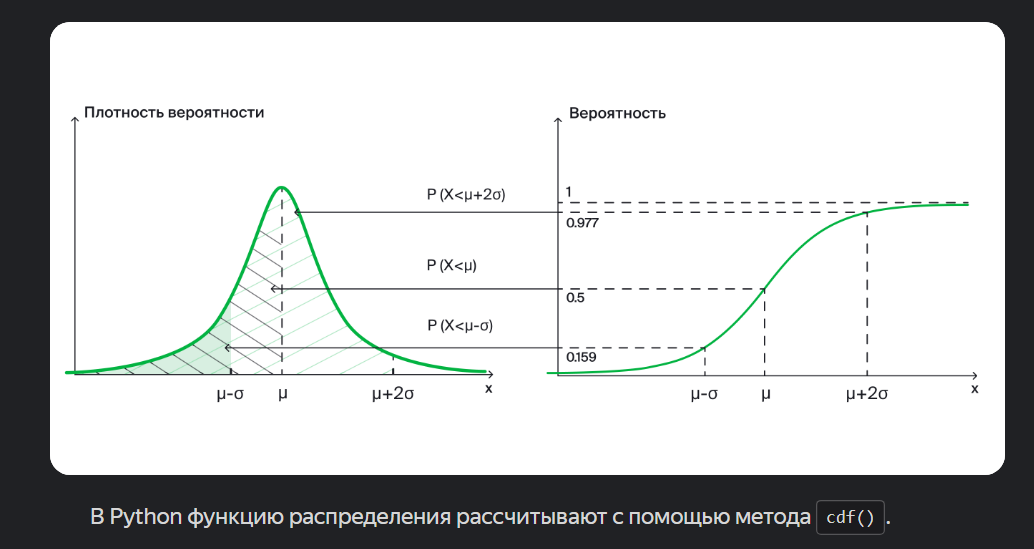

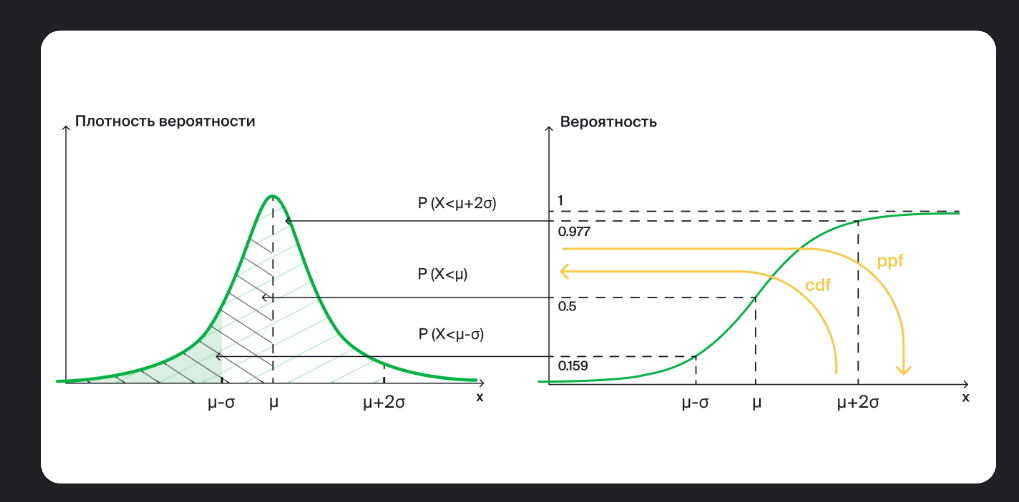

In [50]:
for i in range (1, 13):
    trials = 100 * i
    print(f"i: {i, trials}\tprobability: {(st.binom.cdf(99, trials, 0.1)).round(3)}")

i: (1, 100)	probability: 1.0
i: (2, 200)	probability: 1.0
i: (3, 300)	probability: 1.0
i: (4, 400)	probability: 1.0
i: (5, 500)	probability: 1.0
i: (6, 600)	probability: 1.0
i: (7, 700)	probability: 1.0
i: (8, 800)	probability: 0.987
i: (9, 900)	probability: 0.854
i: (10, 1000)	probability: 0.485
i: (11, 1100)	probability: 0.145
i: (12, 1200)	probability: 0.022


При 100-а розданных промокодов, вероятность того, что успешно продлят подписку менее или равно 99 пользователей будет равна 1-ке, или по другому можно сказать, что это может быть или 5 продливших подписку пользователей, или 99 пользователей
                
т.е. это нулевой для маркетологов результат, который никого не устраивает
        
А чем больше промокодов мы раздаем, тем вероятность получить такой результат уменьшается, например при 900-а розданных промокодов уже только с 0,856 вероятностью мы получим или 5 продливших подписку пользователей, или 99 пользователей        
        
т.е. с вероятностью 0,144 мы получим 100 или более пользователей продливших подписку, но нам надо 95%        


Для того чтобы построить нужный нам график, придется из формулы вычесть 1-ку
        
1 - значение кумулятивной функции распределения `binom.cdf(k, n, p)` покажет вероятность того, что случайная величина примет значение, которое будет не меньше заданной, т.к. нам необходимо выйти на уровень 95%, почему выбираем значение 99, т.к. по определению функции → меньше или равно       
        
        

In [51]:
for i in range (1, 13):
    trials = 100 * i
    print(f"i: {i, trials}\ttarget_probability: {(1 - st.binom.cdf(99, trials, 0.1)).round(3)}");    
   
print(f"i: {13, 1161}\ttarget_probability: {(1 - st.binom.cdf(99, 1161, 0.1)).round(3)}")

i: (1, 100)	target_probability: 0.0
i: (2, 200)	target_probability: 0.0
i: (3, 300)	target_probability: 0.0
i: (4, 400)	target_probability: 0.0
i: (5, 500)	target_probability: 0.0
i: (6, 600)	target_probability: 0.0
i: (7, 700)	target_probability: 0.0
i: (8, 800)	target_probability: 0.013
i: (9, 900)	target_probability: 0.146
i: (10, 1000)	target_probability: 0.515
i: (11, 1100)	target_probability: 0.855
i: (12, 1200)	target_probability: 0.978
i: (13, 1161)	target_probability: 0.95


  
        
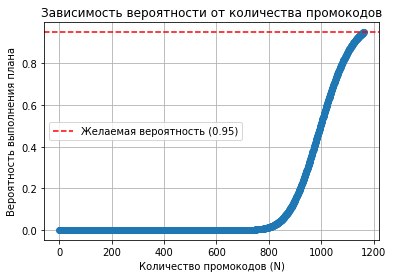        

### check

Примеры особенности объединения, в т.ч. с параметрами по умолчанию при merge (для справки в join такая же «засада» по характеру, но другая по исполнению)
        
Использование параметров по умолчанию может привести к потере данных при объединении        
     
         

In [52]:
dfg1 = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    },
    index=[0, 1, 2, 3],
)

dfr4 = pd.DataFrame(
    {
        "B": ["B2", "B3", "B6", "B7"],
        "D": ["D2", "D3", "D6", "D7"],
        "F": ["F2", "F3", "F6", "F7"],
        "E": [np.nan, np.nan, np.nan, np.nan]
    },
    index=[2, 3, 6, 0],
)

In [53]:
display(dfg1, dfr4)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


,B,D,F,E
2,B2,D2,F2,NaN
3,B3,D3,F3,NaN
6,B6,D6,F6,NaN
0,B7,D7,F7,NaN


In [54]:
dfg1.merge(dfr4, left_on=dfg1.index, right_on=dfr4.index, how='outer')

,key_0,A,B_x,C,D_x,B_y,D_y,F,E
0,0,A0,B0,C0,D0,B7,D7,F7,NaN
1,1,A1,B1,C1,D1,NaN,NaN,NaN,NaN
2,2,A2,B2,C2,D2,B2,D2,F2,NaN
3,3,A3,B3,C3,D3,B3,D3,F3,NaN
4,6,NaN,NaN,NaN,NaN,B6,D6,F6,NaN


In [55]:
dfg1.merge(dfr4, 'outer')

,A,B,C,D,F,E
0,A0,B0,C0,D0,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN
2,A2,B2,C2,D2,F2,NaN
3,A3,B3,C3,D3,F3,NaN
4,NaN,B6,NaN,D6,F6,NaN
5,NaN,B7,NaN,D7,F7,NaN


In [56]:
dfg1.merge(dfr4)

,A,B,C,D,F,E
0,A2,B2,C2,D2,F2,NaN
1,A3,B3,C3,D3,F3,NaN


In [57]:
dfg1.merge(dfr4, 'inner')

,A,B,C,D,F,E
0,A2,B2,C2,D2,F2,NaN
1,A3,B3,C3,D3,F3,NaN


####  check при объединении таблиц без пропусков получаем пропуски

In [58]:
dfg1 = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    },
    index=[0, 1, 2, 3],
)

dfr4 = pd.DataFrame(
    {
        "B": ["B2", "B3", "B6", "B7"],
        "D": ["D2", "D3", "D6", "D7"],
        "F": ["F2", "F3", "F6", "F7"],
        
        
    },
    index=[2, 3, 6, 0],
)

In [59]:
dfg1.merge(dfr4, how='outer')

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,F2
3,A3,B3,C3,D3,F3
4,NaN,B6,NaN,D6,F6
5,NaN,B7,NaN,D7,F7


### check

Пример Закона больших чисел в действии (обратном), удалим 20 процентов (больше общепринятых 10%) всех данных из таблицы, где мы рассчитали выручку

In [60]:
dfg_first = data_grouped.copy()
dfg_first.columns

Index(['distance', 'duration', 'amount', 'subscription_type', 'minute_price',
       'start_ride_price', 'subscription_fee', 'payment'],
      dtype='object')

In [61]:
x = 'subscription_type'
y = dfg_first.columns[-1]
y

'payment'

In [62]:
dfg_first.groupby(x)[y].mean().round(1).to_frame()

,payment
subscription_type,
free,328.6
ultra,362.8


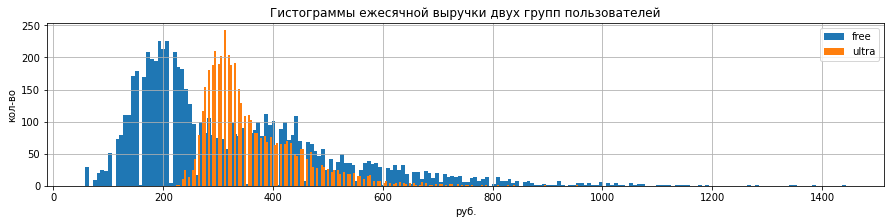

In [63]:
dfg_first.groupby(x)[y].hist(bins=200, figsize=(15,3), legend=True)
plt.title('Гистограммы ежесячной выручки двух групп пользователей')
plt.xlabel('руб.')
plt.ylabel('кол-во');

In [64]:
# копируем таблицу
dfg = dfg_first.copy()


In [65]:
dfg.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11331 entries, (1, 1, 6, 0, 199) to (1534, 12, 8, 50, 0)
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   distance           11331 non-null  float64
 1   duration           11331 non-null  float64
 2   amount             11331 non-null  int64  
 3   subscription_type  11331 non-null  object 
 4   minute_price       11331 non-null  int64  
 5   start_ride_price   11331 non-null  int64  
 6   subscription_fee   11331 non-null  int64  
 7   payment            11331 non-null  float64
dtypes: float64(3), int64(4), object(1)
memory usage: 787.0+ KB


In [66]:
# удаляем данные, 20%
for col in dfg.columns:
    dfg.loc[dfg.sample(frac=0.2).index, col] = np.nan

In [67]:
dfg.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11331 entries, (1, 1, 6, 0, 199) to (1534, 12, 8, 50, 0)
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   distance           9065 non-null   float64
 1   duration           9065 non-null   float64
 2   amount             9065 non-null   float64
 3   subscription_type  9065 non-null   object 
 4   minute_price       9065 non-null   float64
 5   start_ride_price   9065 non-null   float64
 6   subscription_fee   9065 non-null   float64
 7   payment            9065 non-null   float64
dtypes: float64(7), object(1)
memory usage: 1.1+ MB


In [68]:
dfg.groupby(x)[y].mean().round(1).to_frame()

,payment
subscription_type,
free,329.6
ultra,362.2


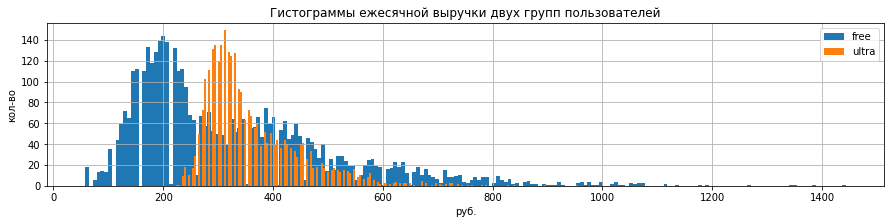

In [69]:
dfg.groupby(x)[y].hist(bins=200, figsize=(15,3), legend=True)
plt.title('Гистограммы ежесячной выручки двух групп пользователей')
plt.xlabel('руб.')
plt.ylabel('кол-во');

Если сравнить средние значения выручки, даже после удаления 20-ти процентов данных (но одно важное условие — данные удалялись случайным образом), они изменились незначительно, как и характер распределения самих данных (кол-во данных уменьшилось, безусловно).
        
Для сравнения представлен рисунок первой гистограммы
        
Закон больших чисел действует и в обратном направлении — у нас нет необходимости собирать 100% данных, чтобы проверить основные гипотезы, при условии, что выборка достаточно большая              
         

### check

Приведу пример и теорию для понимания формулировок и интерпретации итогов проведения гипотез</b>
        
      
Задача. Приведены два датасета: сумма покупок, совершённых за месяц посетителями, привлечёнными по двум разным каналам. В вашем распоряжении случайная выборка из 30 покупок для каждого канала.
        
H0 - средние чеки равны
        
        
H1 - средние чеки НЕ равны

Да сама формулировка нулевой и альтернативной гипотезы звучит именно так, но результат теста интерпретируется другими словами
    
        
Формулирование двусторонних гипотез. <br>
        
<b>Никакие экспериментально полученные данные никогда не подтвердят какую-либо гипотезу. Это наше фундаментальное ограничение. </b>Данные могут лишь не противоречить ей или, наоборот, показывать крайне маловероятные результаты (при условии, что гипотеза верна). Но и в том, и в другом случае нет оснований утверждать, что выдвинутая гипотеза доказана.
Допустим, данные гипотезе не противоречат, тогда мы её не отвергаем. Если же мы приходим к выводу, что получить такие данные в рамках этой гипотезы вряд ли возможно, у нас появляется основание отбросить эту гипотезу.
     

In [70]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


**Интерпретация результата:**

Полученное значение p-value говорит о том, что хотя средний чек пришедших из разных каналов и неодинаков, <b>с вероятностью в почти 19% такое или большее различие можно получить случайно. </b>Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними чеками.
        
А если p-value  будет равно 0,9999, то это значит, что с вероятностью почти 100% <u>такое различие</u> можно получить случайно — то есть почти никогда :)  (но учитываем, что тест проводится на выборке из генеральной совокупности, все может поменяться)
